# About Data

## Data Source

- [Pima Indians Diabetes Database|Kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database)

## Data Description

- `Pregnancies`: Number of times pregnant
- `Glucose`: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- `BloodPressure`: Diastolic blood pressure (mm Hg)
- `SkinThickness`: Triceps skin fold thickness (mm)
- `Insulin`: 2-Hour serum insulin (mu U/ml)
- `BMI`: Body mass index (weight in kg/(height in m)^2)
- `DiabetesPedigreeFunction`: Diabetes pedigree function
- `Age`: Age (years)
- `Outcome`: Class variable (0 or 1) 268 of 768 are 1, the others are 0

# Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

# Import the Data

In [2]:
df = pd.read_csv("data/diabetes.csv")
df.shape

(768, 9)

The data set contains 768 rows and 9 columns.

Let's look at the first five rows.

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df_null = df.isnull()
df_null.sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.describe()
# df.describe(include = 'object')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


There seem to be no missing observations.

- Looking at the descriptive statistics, we see that the minimum values of `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, and `BMI` are 0, which does not make sense considering their nature. Thus, we could consider that the zero values are in fact are missing data, which should be dealt with. 

- There are columns whose median is larger than the mean, meaning that their distributions are skewed.

# Missing Data

Here, we visualize the missing data that we think they are but before, we replace the zeros values of `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, and `BMI` into `np.nan`.

In [7]:
feature_columns = df.columns[:-1].tolist()
feature_columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [8]:
cols = feature_columns[1:6]
cols

['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [9]:
df_null = df[cols].replace(0, np.nan)
df_null = df_null.isnull()
df_null.sum()

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

In [10]:
df_null.mean() * 100

Glucose           0.651042
BloodPressure     4.557292
SkinThickness    29.557292
Insulin          48.697917
BMI               1.432292
dtype: float64

We see that especially the column `Insulin` has many missing values (about 49% of total). This could be problematic when predicting whether an individual develops diabetes or not because insulin is known to be closely related to diabetes.

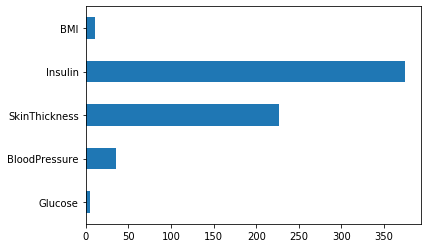

In [11]:
df_null.sum().plot.barh()

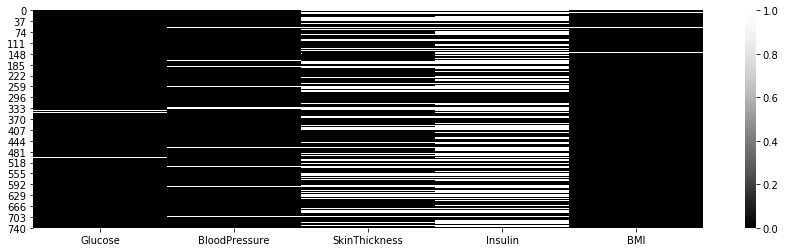

In [12]:
plt.figure(figsize=(15, 4))
sns.heatmap(df_null, cmap="Greys_r")

# Explore Target Variable: `Outcome`

In this section, we explore `Outcome` which is a binary variable that represent whether an individual has diabetes (1) or not (0).

In [13]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

Of the 768 observations, 500 are not diabetic, and the remaining 268 are diagnosed with diabetes.

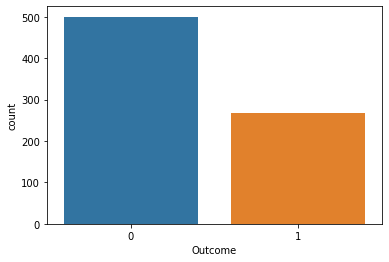

In [14]:
sns.countplot(data=df, x="Outcome")

In [15]:
df["Outcome"].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

Diabetes patients account for about 35 percent of the total.

## Relationship between `Outcome` and the independent variables.
### `Pregnancies`
Now we look at the relationship between this variable and the other variables.
Let's start from `Pregnancies` which shows how many an individual was pregnant.

In [16]:
df_po = df.groupby(["Pregnancies"])["Outcome"].agg(["mean", "count"])#.reset_index()
df_po

,mean,count
Pregnancies,,
0,0.342342,111
1,0.214815,135
2,0.184466,103
3,0.360000,75
4,0.338235,68
5,0.368421,57
6,0.320000,50
7,0.555556,45
8,0.578947,38


This table shows the number and proportion of diabetic patients according to each number of pregnancies.

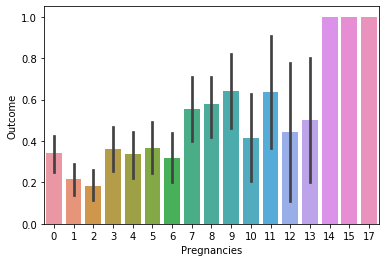

In [17]:
sns.barplot(data=df, x="Pregnancies", y="Outcome")

The higher the number of pregnancies is, the higher the proportion of incidence of diabetes is. However, it should be taken into account that as the number of pregnancies increases, less data we have..

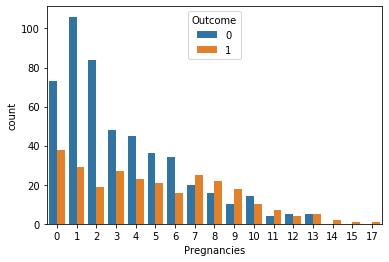

In [18]:
sns.countplot(data=df, x="Pregnancies", hue="Outcome")

If the number of pregnancies is more than 6 times, there are more diabetic patients. Thus, we could make this variable into a categorical one with two categories based on 6. This may be necessary if we want to use tree-based classifiers because the more categories there are, the more branches there are, and overfitting can occur.

In [26]:
df["Pregnancies_high"] = df["Pregnancies"] > 6
df[["Pregnancies", "Pregnancies_high"]].head()

,Pregnancies,Pregnancies_high
0,6,False
1,1,False
2,8,True
3,1,False
4,0,False


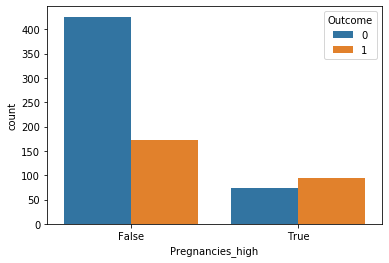

In [27]:
sns.countplot(data=df, x="Pregnancies_high", hue="Outcome")

### `BMI`
Next, let's look at the relationship with `BMI`.

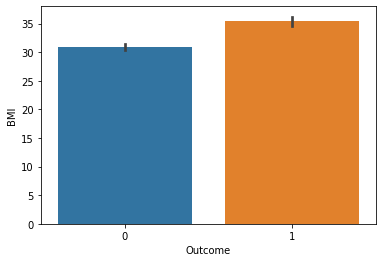

In [28]:
sns.barplot(data=df[df['BMI']>0], x='Outcome', y="BMI")

The average BMI of diabetics is shown to be higher than that of non-diabetics.

### `Glucose`

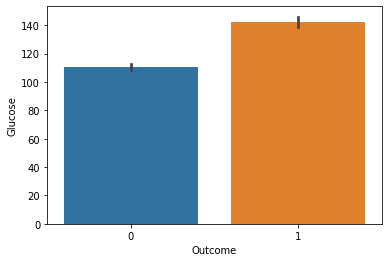

In [29]:
sns.barplot(data=df[df['Glucose']>0], x="Outcome", y="Glucose")

The same applies to the average glucose level.

### `Insulin`

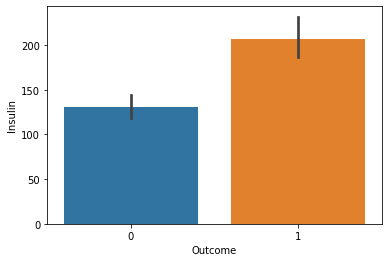

In [30]:
sns.barplot(data=df[df['Insulin']>0], x="Outcome", y="Insulin")

The same is true for `Insulin` as well.

### `Age`

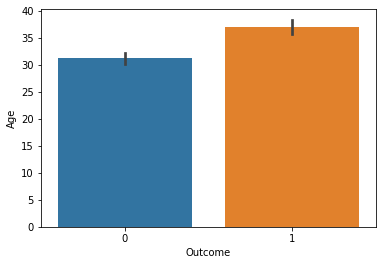

In [31]:
sns.barplot(data=df, x="Outcome", y="Age")

The average age of diabetic patients is about 35, about 5 years older than the average age of non-patient people.

### `BloodPressure`

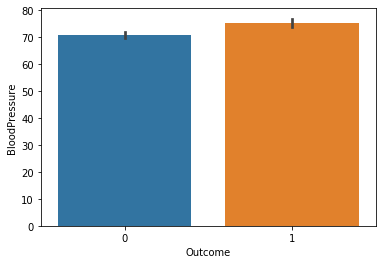

In [32]:
sns.barplot(data=df[df['BloodPressure']>0], x="Outcome", y="BloodPressure")

There seems to be little difference in average blood pressure between diabetics and non-diabetics.

### `SkinThickness`

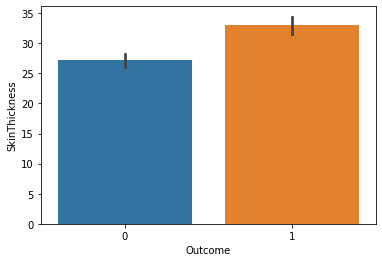

In [38]:
sns.barplot(data=df[df['SkinThickness']>0], x="Outcome", y="SkinThickness")

On average, diabetics have thicker triceps skin wrinkles.

### `DiabetesPedigreeFunction`

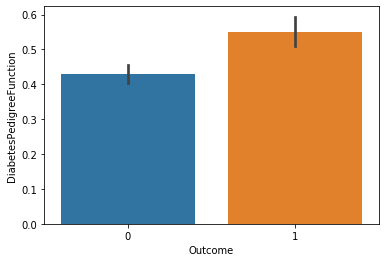

In [33]:
sns.barplot(data=df, x="Outcome", y="DiabetesPedigreeFunction")

Diabetes patients generally have a more history of diabetes.

# Correlation Analysis

In [34]:
df_matrix = df.iloc[:,1:-2].replace(0, np.nan)
df_matrix[["Pregnancies", "Outcome"]] = df[["Pregnancies", "Outcome"]]
df_corr = df_matrix.corr()
df_corr["Outcome"]

Glucose                     0.494650
BloodPressure               0.170589
SkinThickness               0.259491
Insulin                     0.303454
BMI                         0.313680
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Pregnancies                 0.221898
Outcome                     1.000000
Name: Outcome, dtype: float64

Looking at the correlation coefficient between variables, variables `Glucose`, `Insulin`, and `BMI` have a strong positive correlation with the dependent variable, `Outcome`.

We also look at the relationship between independent variables.

In [35]:
df_corr.style.background_gradient()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies,Outcome
Glucose,1.000000,0.223192,0.228043,0.581186,0.232771,0.137246,0.267136,0.128135,0.494650
BloodPressure,0.223192,1.000000,0.226839,0.098272,0.289230,-0.002805,0.330107,0.214178,0.170589
SkinThickness,0.228043,0.226839,1.000000,0.184888,0.648214,0.115016,0.166816,0.100239,0.259491
Insulin,0.581186,0.098272,0.184888,1.000000,0.228050,0.130395,0.220261,0.082171,0.303454
BMI,0.232771,0.289230,0.648214,0.228050,1.000000,0.155382,0.025841,0.021719,0.313680
DiabetesPedigreeFunction,0.137246,-0.002805,0.115016,0.130395,0.155382,1.000000,0.033561,-0.033523,0.173844
Age,0.267136,0.330107,0.166816,0.220261,0.025841,0.033561,1.000000,0.544341,0.238356
Pregnancies,0.128135,0.214178,0.100239,0.082171,0.021719,-0.033523,0.544341,1.000000,0.221898
Outcome,0.494650,0.170589,0.259491,0.303454,0.313680,0.173844,0.238356,0.221898,1.000000


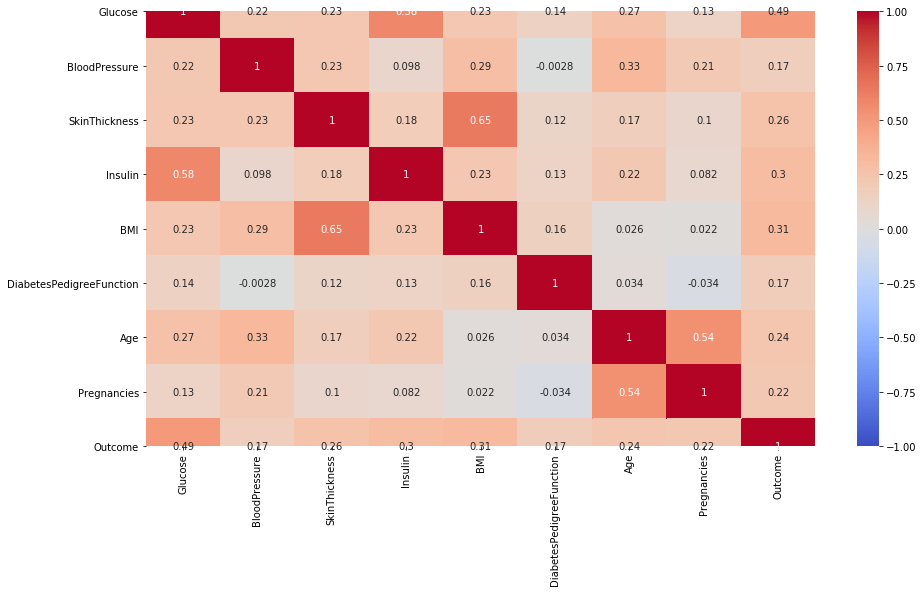

In [52]:
plt.figure(figsize=(15, 8))
sns.heatmap(df_corr, annot=True, vmax=1, vmin=-1, cmap="coolwarm")

The variables with strong correlation are as follows.
- `Insulin` and `Glucose`; 0.58
- `SkinThickness` and `BMI`; 0.65
- `Age` and `Pregnancies`; 0.54

## `Glucose` and `Insulin`

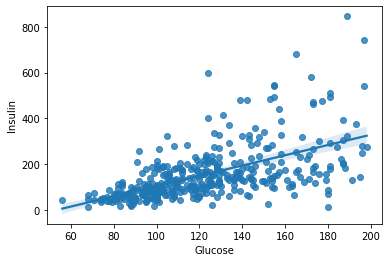

In [59]:
sns.regplot(data=df_matrix, x="Glucose", y="Insulin")

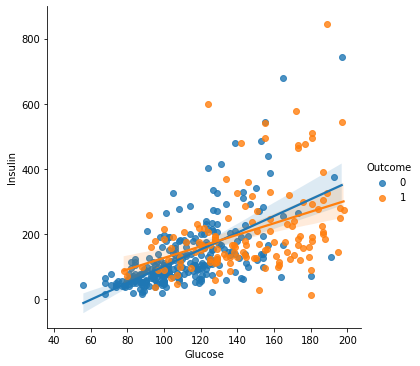

In [61]:
sns.lmplot(data=df_matrix, x="Glucose", y="Insulin", hue="Outcome")

Whether or not diabetes occurs does not seem to have much impact on the relationship between `Glucose` and `Insulin`.

## `SkinThickness` and `BMI`

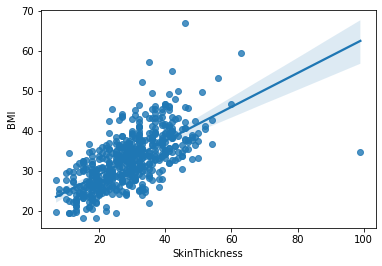

In [57]:
sns.regplot(data=df_matrix, x="SkinThickness", y="BMI")

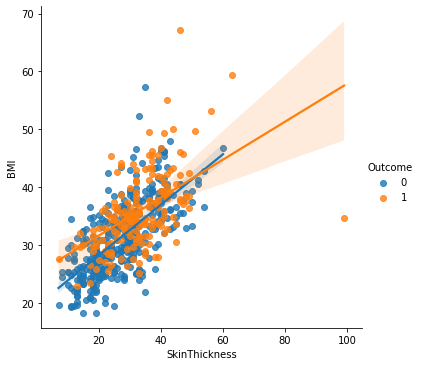

In [62]:
sns.lmplot(data=df_matrix, x="SkinThickness", y="BMI", hue='Outcome')

The same conclusion can be drawn for `SkinThickness` and `BMI`.

## `Age` and `Pregnancies`

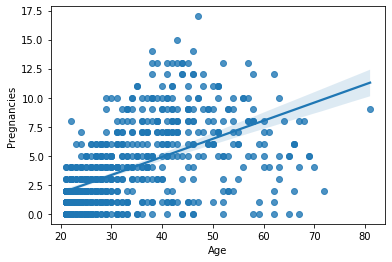

In [58]:
sns.regplot(data=df_matrix, x="Age", y="Pregnancies")

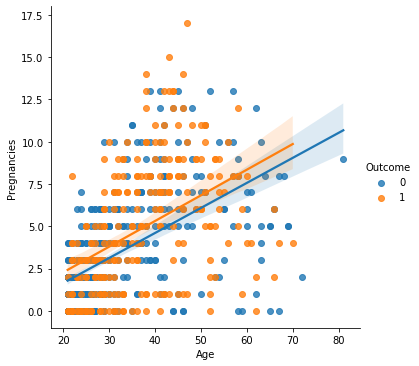

In [63]:
sns.lmplot(data=df_matrix, x="Age", y="Pregnancies", hue='Outcome')

The same is also true for this case.

# Normality
We draw a histogram of the variables to see if the distribution is close to the normal distribution.

In [36]:
cols = df_matrix.columns[:-1].tolist()
cols

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Pregnancies']

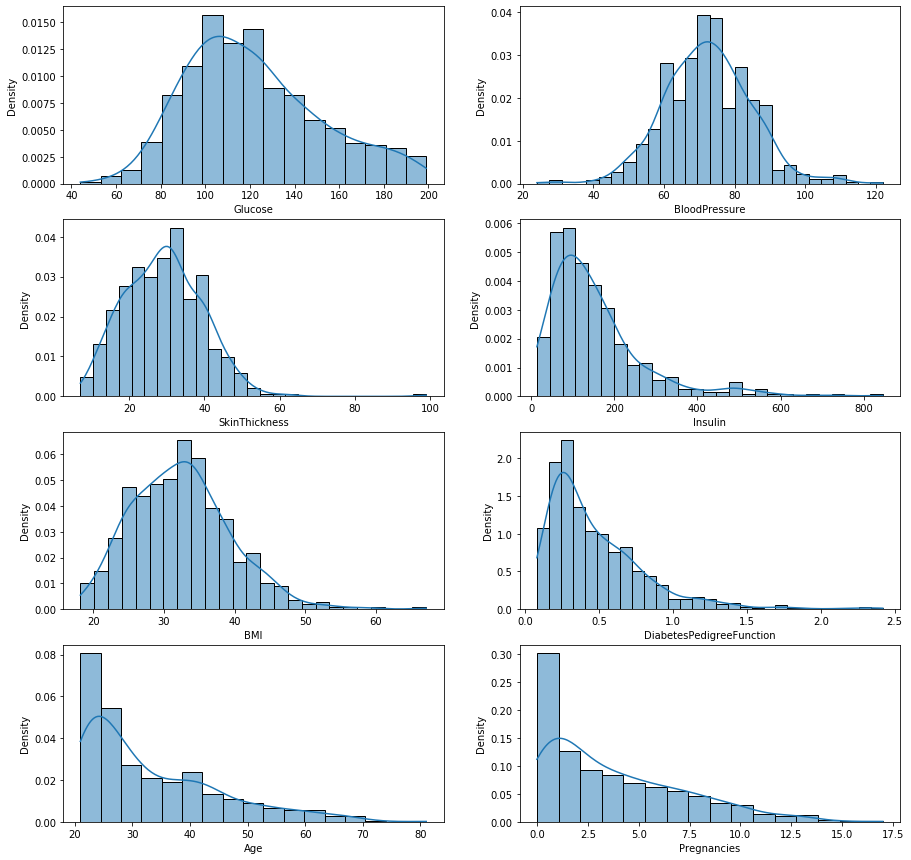

In [62]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))

for i, col_name in enumerate(cols):
    row = i // 2
    col = i % 2
    sns.histplot(data=df_matrix, x=col_name, kde=True, ax=axes[row][col], stat="density")

The distribution of variables other than `Glucose` and `BloodPressure` seems skewed.

This time, we draw the histograms depending on whether diabetes occurs or not.

In [63]:
df_0 = df_matrix[df_matrix["Outcome"] == 0]
df_1 = df_matrix[df_matrix["Outcome"] == 1]
df_0.shape, df_1.shape

((500, 9), (268, 9))

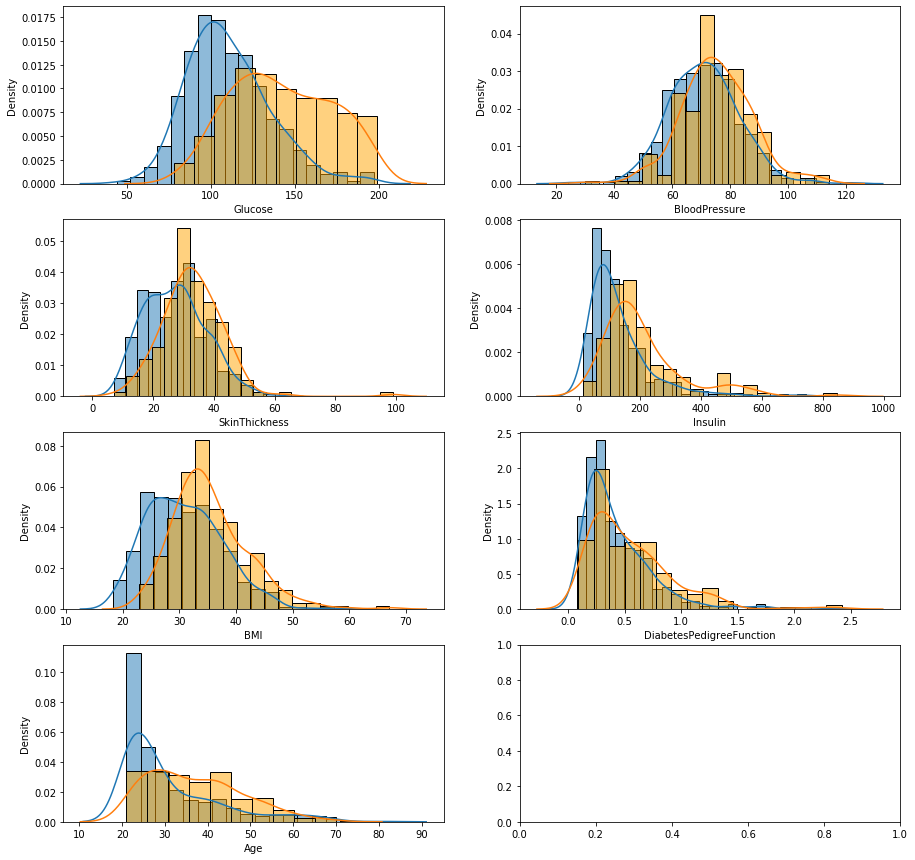

In [68]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))

for i, col_name in enumerate(cols[:-1]):
    row = i // 2
    col = i % 2
    sns.histplot(data=df_0, x=col_name, ax=axes[row][col], stat="density", alpha=0.5)
    sns.histplot(data=df_1, x=col_name, ax=axes[row][col], stat="density", color="orange", alpha=0.5)
    sns.kdeplot(df_0[col_name],ax=axes[row][col])
    sns.kdeplot(df_1[col_name], ax=axes[row][col], alpha=0.5)

If you look at the histogram of each variable following the onset of diabetes, people with high glucose and BMI have a high incidence of diabetes. And blood pressure seems to have nothing to do with the incidence of diabetes.

It can be seen that a specific value of the histogram determines whether diabetes occurs or not. With this specific value, we could express numerical variables as categorical variables.